# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Bitcoin’s Bearish Mood May Vanish Coming Week! These Crucial Levels Can Revive Bullish Goals.  The post Bitcoin’s Bearish Mood May Vanish Coming Week! These Crucial Levels Can Revive Bullish Goals appeared first on Coinpedia Fintech News The last couple of days have been a rollercoaster journey for the entire crypto space, and there is no sign of stopping after FTX’s CEO Sam Bankman-Fried resigned by filing a chapter 11 bankruptcy. Moreover, the huge fluctuation due to FTX’s collapse and correlation of BTC with the stock market had taken into effect when … ... [| Skaityti daugiau](https://coinpedia.org/bitcoin/bitcoins-bearish-mood-may-vanish-coming-week-these-crucial-levels-can-revive-bullish-goals/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Moderna is banking on a combined COVID, flu and RSV vaccine. Will it work? | CBC News.  Moderna is developing a combined COVID-19, flu and RSV vaccine — but hasn't released data to show it would work safely. ... [| Skaityti daugiau](http://www.cbc.ca/news/health/moderna-covid-flu-rsv-vaccine-1.6647447) 

### Kainų kaita pandemijos metu

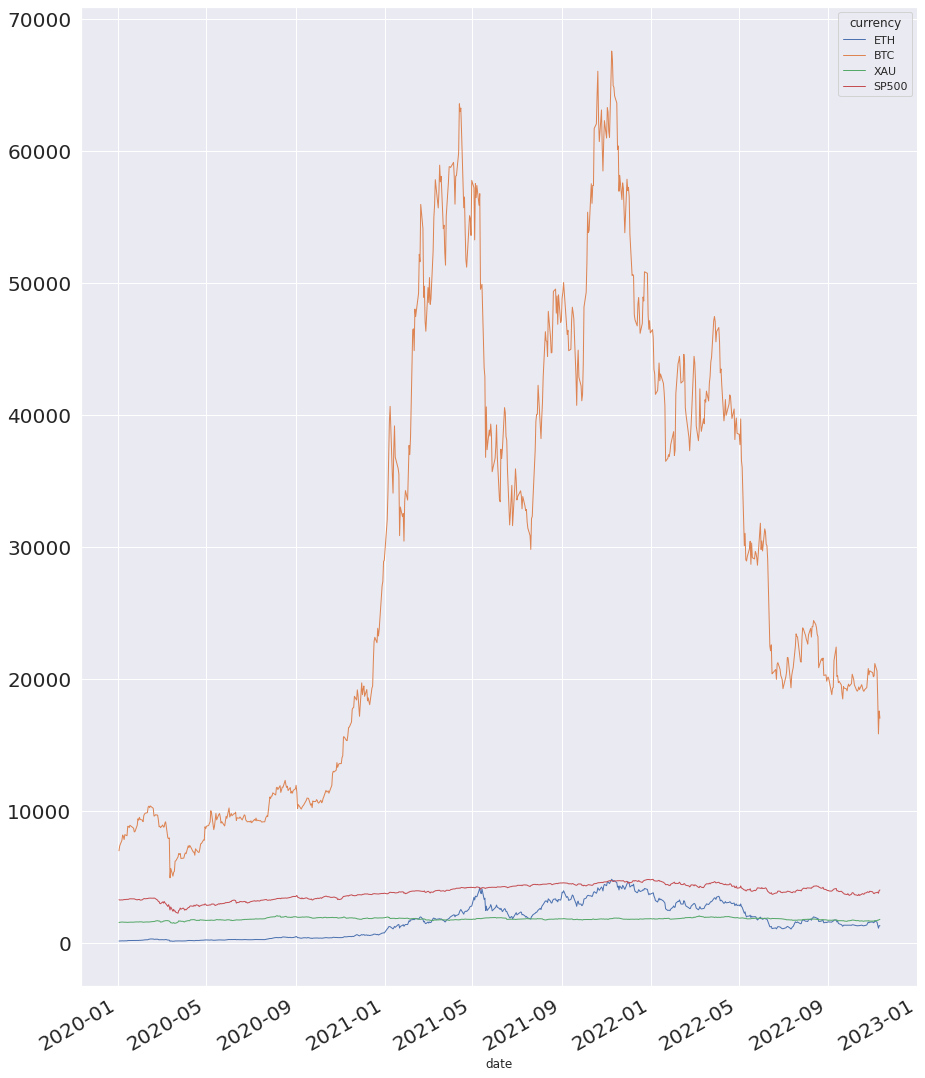

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.896838,0.254934,0.913890
BTC,0.896838,1.000000,0.240814,0.841262
XAU,0.254934,0.240814,1.000000,0.356455
SP500,0.913890,0.841262,0.356455,1.000000


In [8]:
#hide ### Koreliacijos matrica.

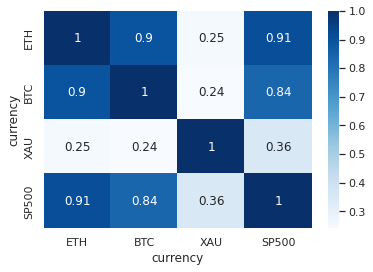

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')